In [819]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [820]:
# Importing the data / Leitura dos dados

url_costs_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Y.Afisha/refs/heads/main/costs_us.csv'

costs_log = pd.read_csv(url_costs_log, sep = ',')

url_orders_log ='https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Y.Afisha/refs/heads/main/orders_log_us.csv'

orders_log = pd.read_csv(url_orders_log, sep = ',')

url_visits_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Y.Afisha/refs/heads/main/visits_log_us.csv'

visits_log = pd.read_csv(url_visits_log, sep = ',')

## Data Cleaning / Limpeza dos Dados

In [821]:
costs_log.info() # Data info from costs_log / Informações dos dados de costs_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [822]:
costs_log.describe() # Data description from costs_log / Descrição dos dados de costs_log

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [823]:
costs_log.head(10) # Data head from costs_log / Primeiras linhas de costs_log

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [824]:
costs_log['dt'] = pd.to_datetime(costs_log['dt']) # Transforming the date to datetime / Transformando a data para datetime

In [825]:
costs_log.info() # Data info from costs_log / Informações dos dados de costs_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [826]:
costs_log.duplicated().sum() # Checking duplicates from costs_log / Verificando duplicados de costs_log

np.int64(0)

In [827]:
orders_log.info() # Data info from orders_log / Informações dos dados de orders_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [828]:
orders_log.columns = orders_log.columns.str.lower() # Transforming header to lowercase / Transformando o cabeçalho para minúsculo
orders_log = orders_log.rename(columns = {'buy ts': 'buy_ts'}) # Renaming column / Renomeando a coluna

In [829]:
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts']) # Transforming the date to datetime / Transformando a data para datetime

In [830]:
orders_log.info() # Data info from orders_log / Informações dos dados de orders_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [831]:
orders_log.describe() # Data description from orders_log / Descrição dos dados de orders_log

,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18
min,2017-06-01 00:10:00,0.000000,3.135781e+14
25%,2017-10-13 17:28:00,1.220000,4.533567e+18
50%,2017-12-21 14:12:00,2.500000,9.102274e+18
75%,2018-03-02 16:10:00,4.890000,1.368290e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.818359,5.285742e+18


In [832]:
orders_log.head(10) # Data head from orders_log / Primeiras linhas de orders_log

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [833]:
orders_log.duplicated().sum() # Checking duplicates from orders_log / Verificando duplicados de orders_log

np.int64(0)

In [834]:
visits_log.info() # Data info from visits_log / Informações dos dados de visits_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [835]:
visits_log.columns = visits_log.columns.str.lower() # Transforming header to lowercase / Transformando o cabeçalho para minúsculo
visits_log = visits_log.rename(columns = {'end ts': 'end_ts', 'source id' : 'source_id', 'start ts' : 'start_ts'}) # Renaming column / Renomeando a coluna

In [836]:
# Transforming the date to datetime / Transformando a data para datetime

columns_to_convert = ['end_ts', 'start_ts']

for col in columns_to_convert:
    visits_log[col] = pd.to_datetime(visits_log[col]) 

In [837]:
visits_log.info() # Data info from visits_log / Informações dos dados de visits_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [838]:
visits_log.describe() # Data description from visits_log / Descrição dos dados de visits_log

,end_ts,source_id,start_ts,uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


In [839]:
visits_log.head(10) # Data head from visits_log / Primeiras linhas de visits_log

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [840]:
visits_log.duplicated().sum() # Checking duplicates from visits_log / Verificando duplicados de visits_log

np.int64(0)

## Data Analysis / Análise dos Dados

### 1 - Produtos

#### Quantas pessoas usam-no cada dia, semana e mês?


In [841]:
visits_log['day'] = visits_log['start_ts'].dt.dayofweek # Creating a new column with the day of the week / Criando uma nova coluna com o dia da semana

In [842]:
visits_log['week'] = visits_log['start_ts'].dt.isocalendar().week # Creating a new column with the week of the year / Criando uma nova coluna com a semana do ano

In [843]:
visits_log['month'] = visits_log['start_ts'].dt.to_period('M') # Creating a new column with the month of the year / Criando uma nova coluna com o mês do ano

In [844]:
visits_log

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2,51,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,0,8,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,5,26,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,6,20,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2,52,2017-12
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,5,30,2017-07
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,3,4,2018-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,5,9,2018-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,3,44,2017-11


In [845]:
daily_users = visits_log.groupby('day')['uid'].nunique().reset_index() # Creating a new dataframe with the number of unique users per day / Criando um novo dataframe com o número de usuários únicos por dia
daily_users

,day,uid
0,0,45207
1,1,44019
2,2,43154
3,3,47190
4,4,44200
5,5,35110
6,6,34418


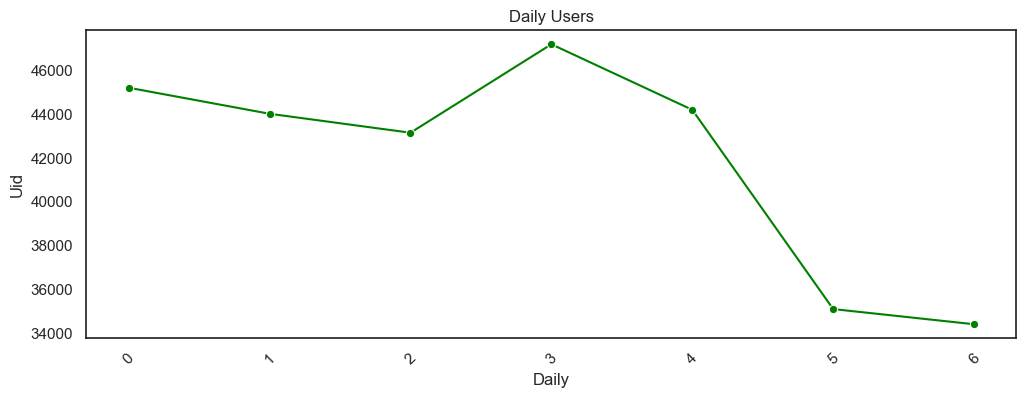

In [846]:
# Creating a graph with the number of unique users per day / Criando um gráfico com o número de usuários únicos por dia

plt.figure(figsize=(12, 4))
sns.lineplot(x='day', y='uid', data = daily_users, marker = 'o', color = 'green')
plt.title('Daily Users')
plt.xlabel('Daily')
plt.ylabel('Uid')
plt.xticks(rotation=45)
plt.show()

In [847]:
monthly_users = visits_log.groupby('month')['uid'].nunique().reset_index() # Creating a new dataframe with the number of unique users per month / Criando um novo dataframe com o número de usuários únicos por mês
monthly_users

,month,uid
0,2017-06,13259
1,2017-07,14183
2,2017-08,11631
3,2017-09,18975
4,2017-10,29692
5,2017-11,32797
6,2017-12,31557
7,2018-01,28716
8,2018-02,28749
9,2018-03,27473


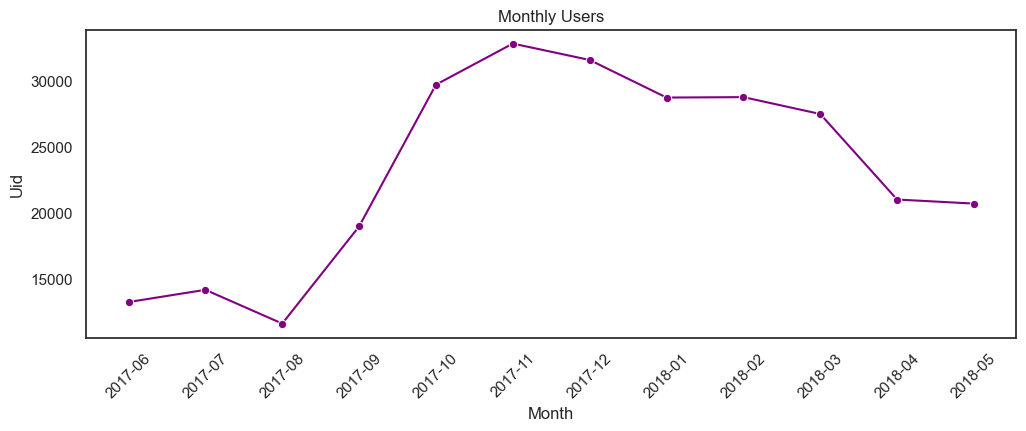

In [848]:
# Creating a graph with the number of unique users per month / Criando um gráfico com o número de usuários únicos por mês

monthly_users['month'] = monthly_users['month'].astype(str) # Transforming column 'month' to str to be possible apply in the graphic / Transformando a coluna 'month' para str para ser possível aplicá-la no gráfico

plt.figure(figsize=(12, 4))
sns.lineplot(x='month', y='uid', data = monthly_users, marker = 'o', color = 'purple')
plt.title('Monthly Users')
plt.xlabel('Month')
plt.ylabel('Uid')
plt.xticks(rotation=45)
plt.show()

In [917]:
weekly_users = visits_log.groupby('week')['uid'].nunique().reset_index() # Creating a new dataframe with the number of unique users per week / Criando um novo dataframe com o número de usuários únicos por semana
weekly_users.sort_values(by = 'uid', ascending = True)

,week,uid
30,31,2364
31,32,2444
29,30,2655
32,33,2746
23,24,2812
24,25,2878
25,26,3064
33,34,3116
26,27,3294
34,35,3694


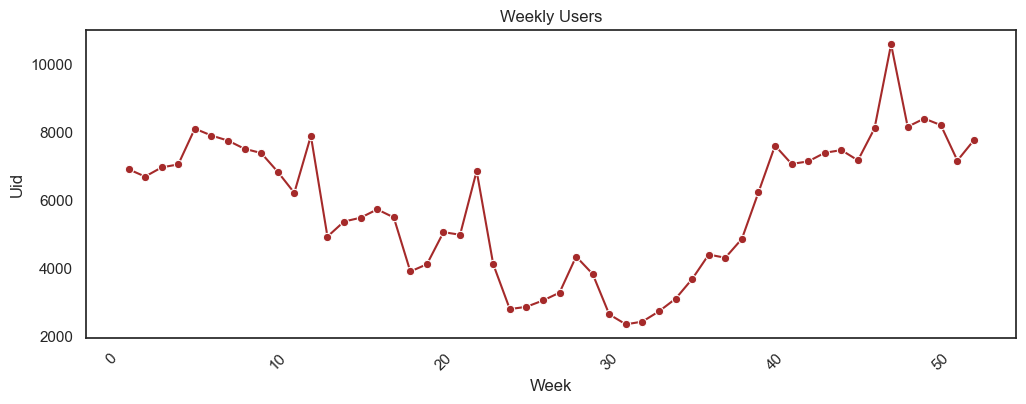

In [850]:
# Creating a graphic with the number of unique users per week / Criando um gráfico com o número de usuários únicos por semana

plt.figure(figsize=(12, 4))
sns.lineplot(x='week', y='uid', data = weekly_users, marker = 'o', color = 'brown')
plt.title('Weekly Users')
plt.xlabel('Week')
plt.ylabel('Uid')
plt.xticks(rotation=45)
plt.show()

#### Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).


In [851]:
visits_log['day'] = visits_log['start_ts'].dt.date

In [852]:
count_sessions_per_day = visits_log.groupby('day').size().reset_index() # Creating a new dataframe with the number of sessions per day / Criando um novo dataframe com o número de sessões por dia
count_sessions_per_day.columns = ['day', 'sessions_per_day']
count_sessions_per_day

,day,sessions_per_day
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


In [919]:
count_sessions_per_day['sessions_per_day'].mean() # Calculating the mean of the sessions per day / Calculando a média do número de sessões por dia

np.float64(987.3626373626373)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_17604\2401869294.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


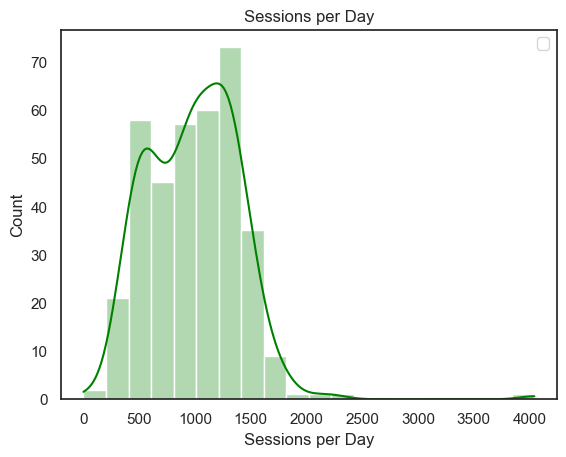

In [853]:
# Creating a graphic with the number of sessions per day / Criando um gráfico com o número de sessões por dia

sns.histplot(x = count_sessions_per_day['sessions_per_day'], color = 'green', bins = 20, kde = True, alpha = 0.3)
plt.title('Sessions per Day')
plt.xlabel('Sessions per Day')
plt.ylabel('Count')
plt.legend(); 

#### Que comprimento tem cada sessão?

In [854]:
duration_sessions = visits_log.groupby(['start_ts', 'end_ts'])['uid'].nunique().reset_index()
duration_sessions

,start_ts,end_ts,uid
0,2017-06-01 00:01:00,2017-06-01 00:02:00,1
1,2017-06-01 00:02:00,2017-06-01 00:02:00,1
2,2017-06-01 00:02:00,2017-06-01 00:16:00,1
3,2017-06-01 00:04:00,2017-06-01 00:04:00,1
4,2017-06-01 00:09:00,2017-06-01 00:11:00,1
...,...,...,...
348012,2018-05-31 23:59:00,2018-05-31 23:59:00,1
348013,2018-05-31 23:59:00,2018-06-01 00:04:00,1
348014,2018-05-31 23:59:00,2018-06-01 00:11:00,1
348015,2018-05-31 23:59:00,2018-06-01 00:12:00,1


In [855]:
duration_sessions['time_duration'] = (duration_sessions['end_ts'] - duration_sessions['start_ts']).dt.total_seconds()
duration_sessions

,start_ts,end_ts,uid,time_duration
0,2017-06-01 00:01:00,2017-06-01 00:02:00,1,60.0
1,2017-06-01 00:02:00,2017-06-01 00:02:00,1,0.0
2,2017-06-01 00:02:00,2017-06-01 00:16:00,1,840.0
3,2017-06-01 00:04:00,2017-06-01 00:04:00,1,0.0
4,2017-06-01 00:09:00,2017-06-01 00:11:00,1,120.0
...,...,...,...,...
348012,2018-05-31 23:59:00,2018-05-31 23:59:00,1,0.0
348013,2018-05-31 23:59:00,2018-06-01 00:04:00,1,300.0
348014,2018-05-31 23:59:00,2018-06-01 00:11:00,1,720.0
348015,2018-05-31 23:59:00,2018-06-01 00:12:00,1,780.0


In [856]:
mean_duration = duration_sessions['time_duration'].mean()
mean_duration

np.float64(657.7742868882842)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_17604\851686585.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


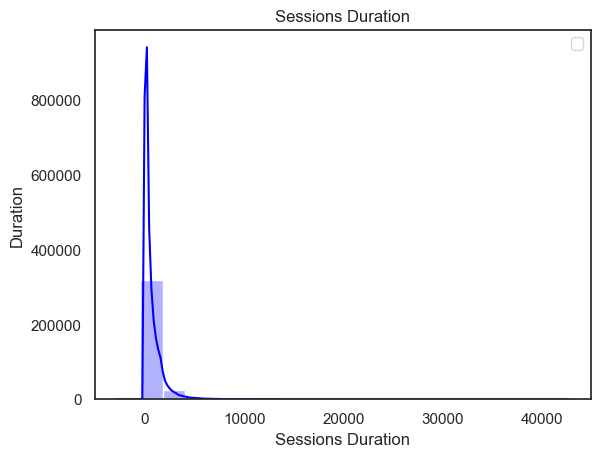

In [857]:
sns.histplot(x = duration_sessions['time_duration'], color = 'blue', bins = 20, kde = True, alpha = 0.3)
plt.title('Sessions Duration')
plt.xlabel('Sessions Duration')
plt.ylabel('Duration')
plt.legend(); 

#### Com que frequência os usuários voltam?

In [858]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12


In [859]:
first_access = visits_log.groupby('uid')['start_ts'].min().reset_index() # Colecting the first access per user / Coletando o primeiro acesso de cada usuário
first_access = first_access.rename(columns = {'start_ts': 'first_access_month'}) # Renaming the column / Renomeando a coluna
visits_log_full = visits_log.merge(first_access, on = 'uid', how = 'left') # Merging the dataframes / Mesclando os dataframes
visits_log_full['first_access_month'] = visits_log_full['first_access_month'].dt.to_period('M') # Converting to period / Convertendo para período
visits_log_full

,device,end_ts,source_id,start_ts,uid,day,week,month,first_access_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017-12
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,2017-07,2017-07
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,2018-01,2018-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,2018-03,2018-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017-11,2017-11


In [860]:
visits_log_full['cohort_return_frequency'] = visits_log_full['month'].astype(int) - visits_log_full['first_access_month'].astype(int) # Creating the cohort return frequency / Criando a frequência de retorno do cohort
visits_log_full

,device,end_ts,source_id,start_ts,uid,day,week,month,first_access_month,cohort_return_frequency
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017-12,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,2017-07,2017-07,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,2018-01,2018-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,2018-03,2018-03,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017-11,2017-11,0


In [861]:
retention = visits_log_full.pivot_table(index = 'first_access_month', columns = 'cohort_return_frequency', values = 'uid', aggfunc = 'nunique') # Pivoting the data / Pivotando os dados
retention

cohort_return_frequency,0,1,2,3,4,5,6,7,8,9,10,11
first_access_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [862]:
# Transforming into percentage / Transformando em porcentagem

for col in retention.columns[1:]:
   retention[col] = retention[col] / retention[0]

retention[0] = retention[0] / retention[0]
retention

cohort_return_frequency,0,1,2,3,4,5,6,7,8,9,10,11
first_access_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


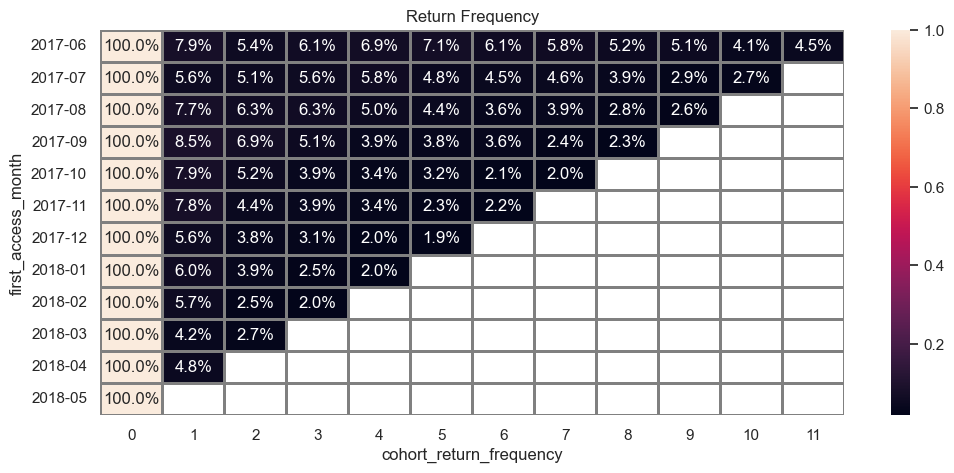

In [863]:
# Plotting the heatmap / Plotando o heatmap

sns.set(style='white')
plt.figure(figsize=(12, 5))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths = 1, linecolor = 'gray')
plt.title('Return Frequency')
plt.yticks(rotation = 0)
plt.show()


### 2 - Vendas

#### Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)

In [864]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12


In [865]:
orders_log

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [866]:
start_session = visits_log.groupby('uid')['start_ts'].min().reset_index() # Colecting the first session of each user / Coletando a primeira sessão de cada usuário
first_order = orders_log.groupby('uid')['buy_ts'].min().reset_index() # Colecting the first order of each user / Coletando a primeira ordem de cada usuário
first_order = first_order.rename(columns = {'buy_ts': 'first_order_month'}) # Renaming column / Renomeando coluna
orders_log_full = orders_log.merge(first_order, on = 'uid', how = 'left') # Merging the dataframes / Mesclando os dataframes
orders_log_full = orders_log_full.merge(start_session, on = 'uid', how = 'left') # Merging the dataframes / Mesclando os dataframes
orders_log_full['first_order_month'] = pd.to_datetime(orders_log_full['first_order_month']) # Converting to datetime / Convertendo para datetime
orders_log_full.head()

,buy_ts,revenue,uid,first_order_month,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


In [867]:
orders_log_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buy_ts             50415 non-null  datetime64[ns]
 1   revenue            50415 non-null  float64       
 2   uid                50415 non-null  uint64        
 3   first_order_month  50415 non-null  datetime64[ns]
 4   start_ts           50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 1.9 MB


In [926]:
orders_log_full['sale_convertion'] = (orders_log_full['first_order_month'] - orders_log_full['start_ts']).dt.days # Creating a new column / Criando uma nova coluna
orders_log_full

,buy_ts,revenue,uid,first_order_month,start_ts,sale_convertion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220


In [869]:
convertion_sale = orders_log_full['sale_convertion'].mean() # Calculating the mean of the column 'sale_convertion' / Calculando a média da coluna 'sale_convertion'
convertion_sale

np.float64(17.419676683526728)

#### Quantos pedidos os clientes fazem durante um determinado período de tempo?

In [870]:
orders_log

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [871]:
orders_log['month_order'] = orders_log['buy_ts'].dt.to_period('M') # Creating a new column / Criando uma nova coluna
first_purchase = orders_log.groupby('uid')['buy_ts'].min().reset_index() # Colecting the first order of each user / Coletando a primeira ordem de cada usuário
first_purchase = first_purchase.rename(columns = {'buy_ts': 'first_purchase_date'}) # Renaming column / Renomeando coluna
orders_number_full = orders_log.merge(first_purchase, on = 'uid', how = 'left') # Merging the dataframes / Mesclando os dataframes 


orders_number_full['first_month'] = orders_number_full['first_purchase_date'].dt.to_period('M') # Creating a new column / Criando uma nova coluna
orders_number_full['first_purchase'] = orders_number_full.apply(lambda row: 1 if row['first_month'] == row['month_order'] else 0, axis=1) # Applying a filter / Applicando um filtro
orders_number_full.head()

,buy_ts,revenue,uid,month_order,first_purchase_date,first_month,first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01 00:10:00,2017-06,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01 00:25:00,2017-06,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01 00:27:00,2017-06,1
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01 00:29:00,2017-06,1
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01 07:58:00,2017-06,1


In [872]:
orders_number_full['cohort_orders'] = orders_number_full['month_order'].astype(int) - orders_number_full['first_month'].astype(int) # Creating a new column / Criando uma nova coluna
orders_number_full['buy_ts'] = orders_number_full['buy_ts'].dt.to_period('M')
orders_number_full

,buy_ts,revenue,uid,month_order,first_purchase_date,first_month,first_purchase,cohort_orders
0,2017-06,17.00,10329302124590727494,2017-06,2017-06-01 00:10:00,2017-06,1,0
1,2017-06,0.55,11627257723692907447,2017-06,2017-06-01 00:25:00,2017-06,1,0
2,2017-06,0.37,17903680561304213844,2017-06,2017-06-01 00:27:00,2017-06,1,0
3,2017-06,0.55,16109239769442553005,2017-06,2017-06-01 00:29:00,2017-06,1,0
4,2017-06,0.37,14200605875248379450,2017-06,2017-06-01 07:58:00,2017-06,1,0
...,...,...,...,...,...,...,...,...
50410,2018-05,4.64,12296626599487328624,2018-05,2018-05-31 23:50:00,2018-05,1,0
50411,2018-05,5.80,11369640365507475976,2018-05,2018-05-31 23:50:00,2018-05,1,0
50412,2018-05,0.30,1786462140797698849,2018-05,2018-05-31 23:54:00,2018-05,1,0
50413,2018-05,3.67,3993697860786194247,2018-05,2018-05-31 23:56:00,2018-05,1,0


In [873]:
orders_pivot_table = orders_number_full.pivot_table(index = 'buy_ts', columns = 'cohort_orders', values = 'uid', aggfunc = 'nunique') # Pivoting the data / Pivotando os dados
orders_pivot_table

cohort_orders,0,1,2,3,4,5,6,7,8,9,10,11
buy_ts,,,,,,,,,,,,
2017-06,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,1923.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1370.0,52.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,2581.0,58.0,57.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,4340.0,130.0,53.0,64.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11,4081.0,206.0,100.0,44.0,49.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12,4383.0,222.0,123.0,74.0,40.0,38.0,62.0,NaN,NaN,NaN,NaN,NaN
2018-01,3373.0,146.0,120.0,92.0,52.0,32.0,36.0,47.0,NaN,NaN,NaN,NaN
2018-02,3651.0,114.0,103.0,106.0,93.0,64.0,30.0,39.0,58.0,NaN,NaN,NaN


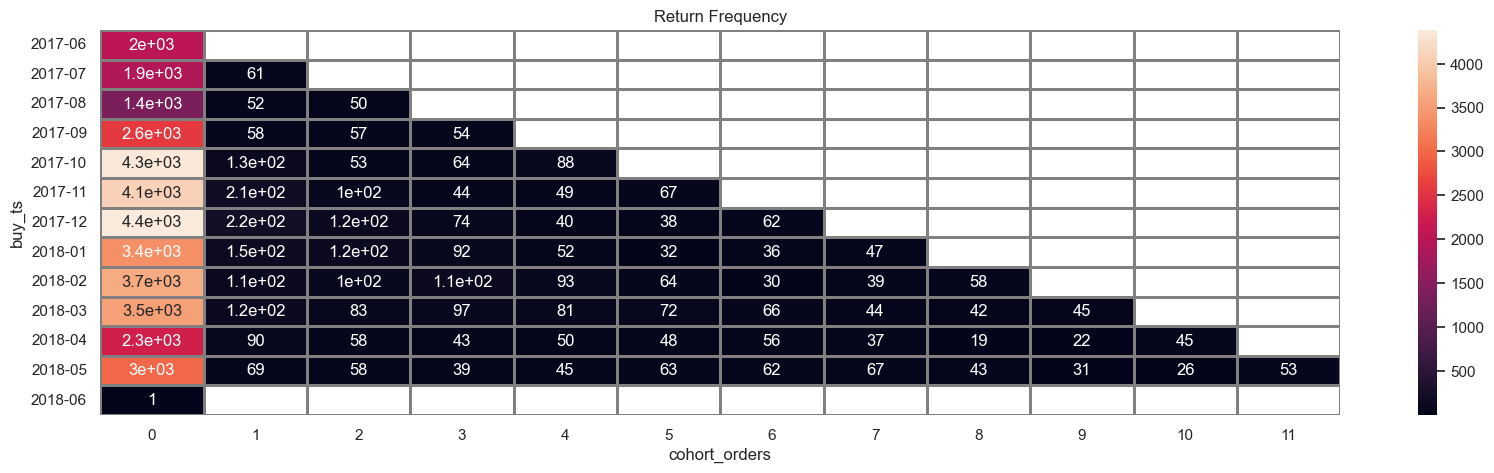

In [874]:
sns.set(style='white')
plt.figure(figsize=(20, 5))
sns.heatmap(orders_pivot_table, annot=True, linewidths = 1, linecolor = 'gray')
plt.title('Return Frequency')
plt.yticks(rotation = 0)
plt.show()

#### Qual é o volume médio de uma compra?

In [875]:
orders_log.head()

,buy_ts,revenue,uid,month_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


In [876]:
orders_revenue = orders_log.groupby('revenue')['uid'].nunique().reset_index() # Creating a new dataframe with the number of unique users per revenue / Criando um novo dataframe com o número de usuários únicos por receita
orders_revenue

,revenue,uid
0,0.00,23
1,0.01,1
2,0.02,1
3,0.03,40
4,0.06,135
...,...,...
1144,1109.10,1
1145,1195.64,1
1146,1221.37,1
1147,1236.28,1


In [935]:
orders_revenue['mean_revenue'] = orders_revenue['revenue'].mean() # Calculating the mean of the revenue / Calculando a média da receita
orders_revenue

,revenue,uid,mean_revenue
0,0.00,23,39.38812
1,0.01,1,39.38812
2,0.02,1,39.38812
3,0.03,40,39.38812
4,0.06,135,39.38812
...,...,...,...
1144,1109.10,1,39.38812
1145,1195.64,1,39.38812
1146,1221.37,1,39.38812
1147,1236.28,1,39.38812


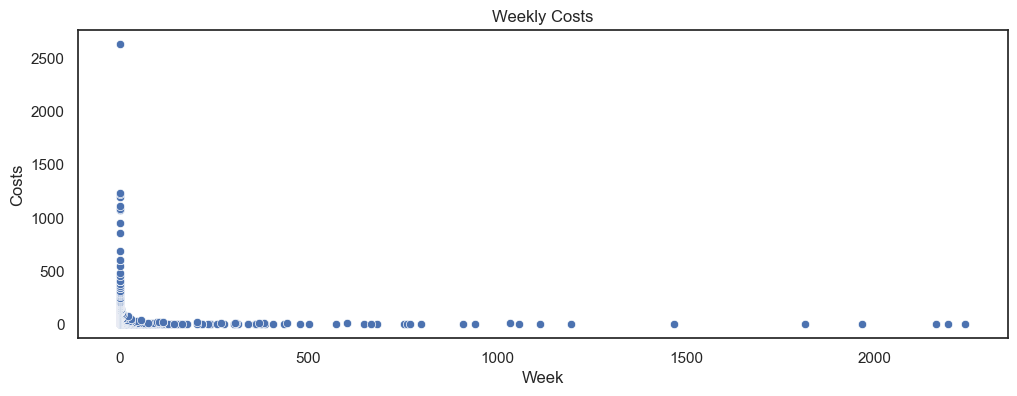

In [946]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x='uid', y='revenue', data = orders_revenue)
plt.title('Weekly Costs')
plt.xlabel('Week')
plt.ylabel('Costs')
plt.show()

#### Quanto dinheiro eles trazem para a empresa (LTV)?

In [879]:
costs_log.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [880]:
orders_log.head()

,buy_ts,revenue,uid,month_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


In [881]:
first_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_purchase_date  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.8 KB


In [882]:
first_purchase.head()

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [883]:
first_purchase['first_purchase_month'] = first_purchase['first_purchase_date'].dt.to_period('M') # Creating a new column / Criando uma nova coluna
first_purchase.head()

,uid,first_purchase_date,first_purchase_month
0,313578113262317,2018-01-03 21:51:00,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06
2,2429014661409475,2017-10-11 18:33:00,2017-10
3,2464366381792757,2018-01-28 15:54:00,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11


In [884]:
orders = pd.merge(orders_log, first_purchase[['uid', 'first_purchase_month']], how='left', on='uid') # Merging the dataframes / Mesclando os dataframes
orders.head()

,buy_ts,revenue,uid,month_order,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06


In [885]:
#

cohorts = (
    orders
    .groupby(['first_purchase_month','month_order'])
    .agg(
        revenue = pd.NamedAgg(column = 'revenue', aggfunc = 'sum'),
        n_buyers = pd.NamedAgg(column = 'uid', aggfunc = 'count')
    )
    .reset_index()
)
cohorts.head(20)

,first_purchase_month,month_order,revenue,n_buyers
0,2017-06,2017-06,9557.49,2354
1,2017-06,2017-07,981.82,177
2,2017-06,2017-08,885.34,174
3,2017-06,2017-09,1931.30,226
4,2017-06,2017-10,2068.58,292
5,2017-06,2017-11,1487.92,218
6,2017-06,2017-12,1922.74,276
7,2017-06,2018-01,1176.56,174
8,2017-06,2018-02,1119.15,212
9,2017-06,2018-03,1225.51,153


In [886]:
margin_rate = 0.5

cohorts['gp'] = cohorts['revenue'] * margin_rate # Calculating the gross profit / Calculando o lucro bruto
cohorts['first_purchase_date'] = cohorts['first_purchase_month'].dt.to_timestamp()
cohorts['order_date'] = cohorts['month_order'].dt.to_timestamp()
cohorts['age'] = (
    cohorts['order_date'] - cohorts['first_purchase_date']
) / pd.to_timedelta(1, 'D') / 30
cohorts['age'] = cohorts['age'].round().astype('int')
cohorts['ltv'] = cohorts['gp'] / cohorts['n_buyers'] # Calculating the lifetime value / Calculando o valor de vida útil

cohorts.head()

,first_purchase_month,month_order,revenue,n_buyers,gp,first_purchase_date,order_date,age,ltv
0,2017-06,2017-06,9557.49,2354,4778.745,2017-06-01,2017-06-01,0,2.030053
1,2017-06,2017-07,981.82,177,490.910,2017-06-01,2017-07-01,1,2.773503
2,2017-06,2017-08,885.34,174,442.670,2017-06-01,2017-08-01,2,2.544080
3,2017-06,2017-09,1931.30,226,965.650,2017-06-01,2017-09-01,3,4.272788
4,2017-06,2017-10,2068.58,292,1034.290,2017-06-01,2017-10-01,4,3.542089


In [ ]:
cohorts_pivot_table = cohorts.pivot_table(index = 'first_purchase_month', columns = 'age', values = 'ltv', aggfunc = 'mean').round(2) # Creating a pivot table / Criando uma tabela pivot
cohorts_pivot_table

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,2.03,2.77,2.54,4.27,3.54,3.41,3.48,3.38,2.64,4.0,6.02,3.02
2017-07,2.64,3.22,5.00,3.32,2.36,1.83,1.89,2.73,2.67,5.9,2.82,NaN
2017-08,2.36,2.99,3.14,3.31,3.98,3.13,2.94,3.56,4.35,2.8,NaN,NaN
2017-09,2.48,6.59,4.18,31.29,7.72,7.66,8.38,5.60,3.89,NaN,NaN,NaN
2017-10,2.19,3.70,2.56,2.80,2.55,2.54,2.14,2.00,NaN,NaN,NaN,NaN
2017-11,2.19,2.05,2.24,3.14,2.22,1.86,2.30,NaN,NaN,NaN,NaN,NaN
2017-12,2.06,2.11,10.04,13.04,7.97,7.06,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.84,2.22,3.23,3.76,1.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.85,2.29,1.73,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


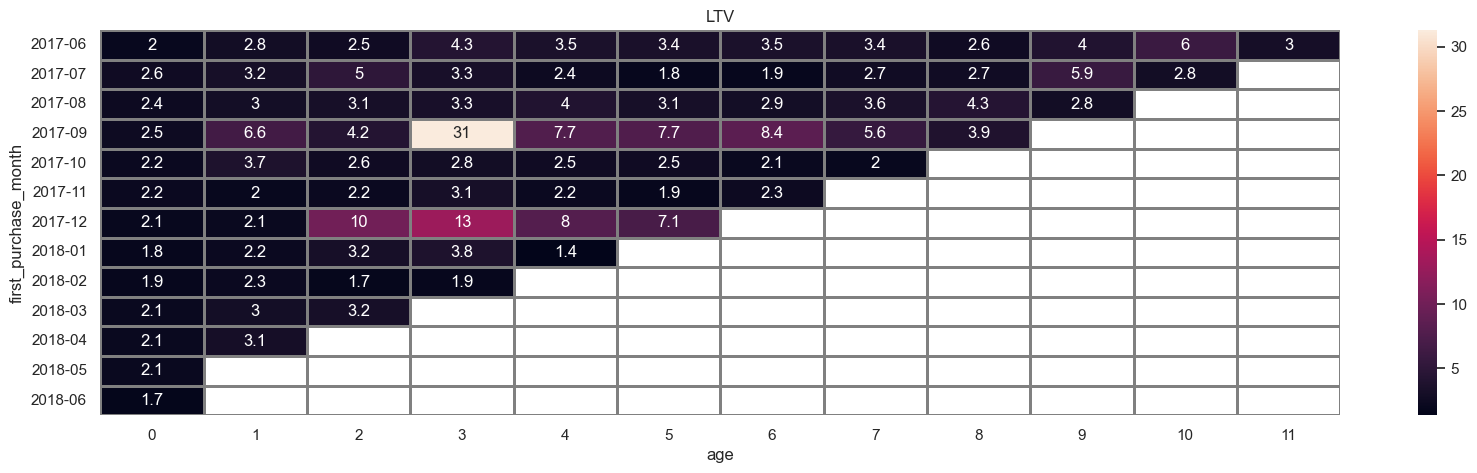

In [888]:
sns.set(style='white')
plt.figure(figsize=(20, 5))
sns.heatmap(cohorts_pivot_table, annot=True, linewidths = 1, linecolor = 'gray')
plt.title('LTV')
plt.yticks(rotation = 0)
plt.show()

### 3 - Marketing

#### Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [889]:
costs_log.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [890]:
total_costs = costs_log['costs'].sum() # Calculating the total cost / Calculando o custo total

print('O custo total é:', total_costs)

O custo total é: 329131.62


In [891]:
costs_per_origin = costs_log.groupby('source_id')['costs'].sum().reset_index() # Calculating the costs per origin / Calculando o custo por origem
costs_per_origin

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


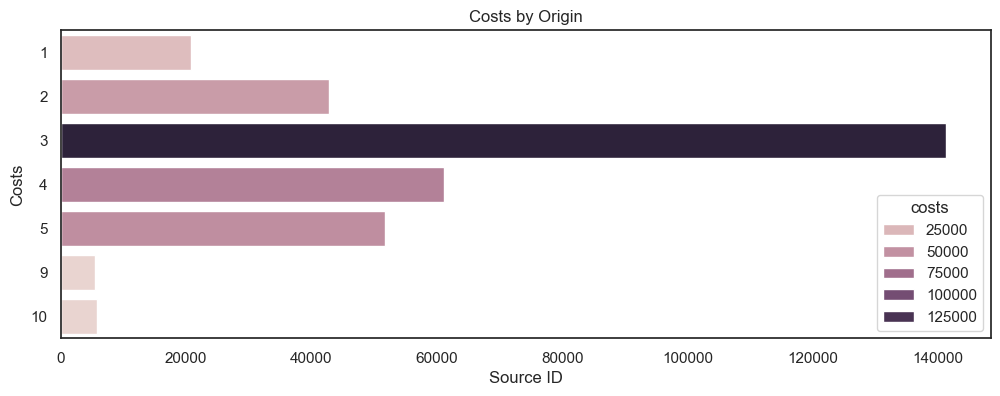

In [892]:
plt.figure(figsize=(12, 4))
sns.barplot(x='costs', y='source_id', data = costs_per_origin, hue = 'costs', orient = 'y')
plt.title('Costs by Origin')
plt.xlabel('Source ID')
plt.ylabel('Costs')
plt.show()

In [893]:
costs_log['month'] = costs_log['dt'].dt.to_period('M') # Creating a new column with the month / Criando uma nova coluna com o mês
costs_log.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [894]:
costs_log['week'] = costs_log['dt'].dt.isocalendar().week # Creating a new column with the week of the year / Criando uma nova coluna com a semana do ano
costs_log.head()

,source_id,dt,costs,month,week
0,1,2017-06-01,75.20,2017-06,22
1,1,2017-06-02,62.25,2017-06,22
2,1,2017-06-03,36.53,2017-06,22
3,1,2017-06-04,55.00,2017-06,22
4,1,2017-06-05,57.08,2017-06,23


In [895]:
weeakly_costs = costs_log.groupby('week')['costs'].sum().reset_index() # Calculating the costs per week / Calculando o custo por semana
weeakly_costs.head()

,week,costs
0,1,8067.81
1,2,6855.05
2,3,7913.74
3,4,7174.12
4,5,8130.57


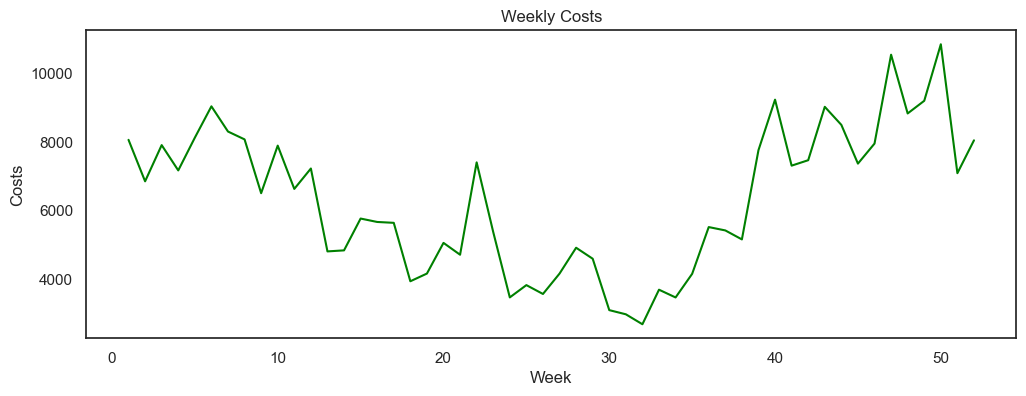

In [947]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='week', y='costs', data = weeakly_costs, color = 'green')
plt.title('Weekly Costs')
plt.xlabel('Week')
plt.ylabel('Costs')
plt.show()

In [896]:
monthly_costs = costs_log.groupby('month')['costs'].sum().reset_index() # Calculating the costs per month / Calculando o custo por mês
monthly_costs['month'] = monthly_costs['month'].astype(str) # Transforming month to str to be possible apply in the graphic / Transformando o mês para str para ser possível aplicá-lo no gráfico
monthly_costs

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


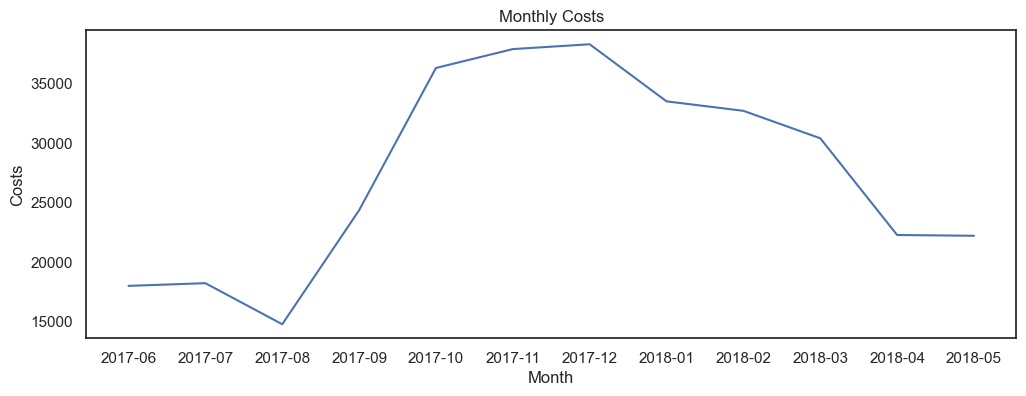

In [898]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='month', y='costs', data = monthly_costs)
plt.title('Monthly Costs')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.show()

#### Quanto custou a aquisição de clientes para cada origem?

In [958]:
merged_data = pd.merge(visits_log, orders_log, left_on='uid', right_on='uid', how='inner')
merged_data

,device,end_ts,source_id,start_ts,uid,day,week,month,buy_ts,revenue,month_order
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018-03-09 20:25:00,2.33,2018-03
1,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,2017-09,2017-09-04 12:46:00,2.44,2017-09
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,2017-09,2017-10-28 00:01:00,1.53,2017-10
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,2017-09,2017-10-28 19:16:00,1.53,2017-10
4,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018-02-06,6,2018-02,2017-06-25 08:54:00,3.67,2017-06
...,...,...,...,...,...,...,...,...,...,...,...
761802,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,2018-01,2018-01-25 17:38:00,2.93,2018-01
761803,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,2018-01,2018-01-25 22:29:00,0.37,2018-01
761804,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,2018-03,2018-03-03 10:12:00,0.61,2018-03
761805,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017-11,2017-11-02 10:12:00,2.69,2017-11


In [959]:
unique_customers = merged_data.groupby('source_id')['uid'].nunique().reset_index()
unique_customers.columns = ['source_id', 'unique_customers']

In [960]:
total_costs = costs_log.groupby('source_id')['costs'].sum().reset_index()

In [961]:
report = pd.merge(total_costs, unique_customers, on='source_id', how='inner')
report['cac'] = report['costs'] / report['unique_customers']
report

,source_id,costs,unique_customers,cac
0,1,20833.27,7138,2.918642
1,2,42806.04,7305,5.859828
2,3,141321.63,13846,10.206676
3,4,61073.60,14253,4.284965
4,5,51757.10,10156,5.096209
5,9,5517.49,2793,1.975471
6,10,5822.49,1773,3.283976


In [962]:
report['cac'].mean()

np.float64(4.803680914859965)

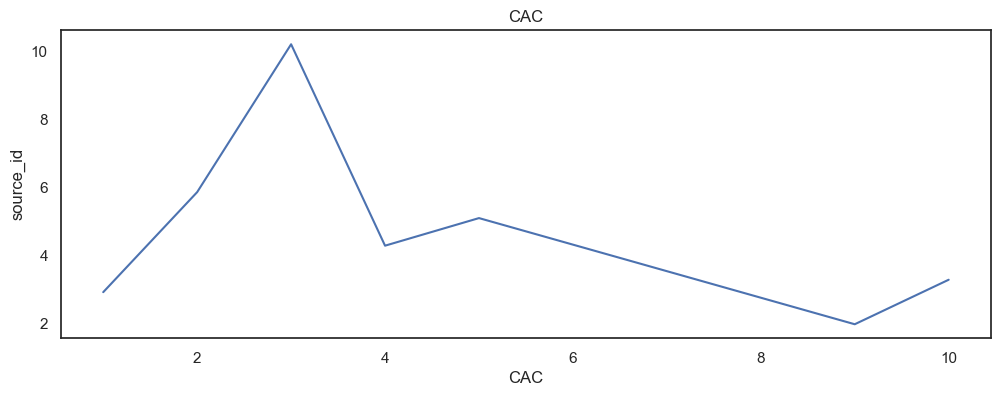

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'source_id', y= 'cac', data = report)
plt.title('CAC')
plt.xlabel('CAC')
plt.ylabel('source_id')
plt.show()

#### Os investimentos valeram a pena? (ROI)

In [905]:
orders_log.head()

,buy_ts,revenue,uid,month_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


In [906]:
costs_log.head()

,source_id,dt,costs,month,week
0,1,2017-06-01,75.20,2017-06,22
1,1,2017-06-02,62.25,2017-06,22
2,1,2017-06-03,36.53,2017-06,22
3,1,2017-06-04,55.00,2017-06,22
4,1,2017-06-05,57.08,2017-06,23


In [907]:
costs_log_g = costs_log.groupby('month')['costs'].sum().reset_index() # Calculating the costs per month / Calculando o custo por mês
costs_log_g

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [908]:
orders_log_g = orders_log.groupby('month_order')['revenue'].sum().reset_index() # Calculating the revenue per month / Calculando o recebimento por mês
orders_log_g

,month_order,revenue
0,2017-06,9557.49
1,2017-07,12539.47
2,2017-08,8758.78
3,2017-09,18345.51
4,2017-10,27987.70
5,2017-11,27069.93
6,2017-12,36388.60
7,2018-01,19417.13
8,2018-02,25560.54
9,2018-03,28834.59


In [909]:
orders_log_g = orders_log_g.rename(columns = {'month_order' : 'month'})

roi_log = orders_log_g.merge(costs_log_g, how = 'left', on = ['month']) # Merging the two dataframes / Mesclando os dois dataframes
roi_log

,month,revenue,costs
0,2017-06,9557.49,18015.00
1,2017-07,12539.47,18240.59
2,2017-08,8758.78,14790.54
3,2017-09,18345.51,24368.91
4,2017-10,27987.70,36322.88
5,2017-11,27069.93,37907.88
6,2017-12,36388.60,38315.35
7,2018-01,19417.13,33518.52
8,2018-02,25560.54,32723.03
9,2018-03,28834.59,30415.27


In [910]:
roi_log['roi'] = (roi_log['revenue'] - roi_log['costs']) / roi_log['costs'] # Calculating the ROI / Calculando o ROI
roi_log

,month,revenue,costs,roi
0,2017-06,9557.49,18015.00,-0.469470
1,2017-07,12539.47,18240.59,-0.312551
2,2017-08,8758.78,14790.54,-0.407812
3,2017-09,18345.51,24368.91,-0.247176
4,2017-10,27987.70,36322.88,-0.229475
5,2017-11,27069.93,37907.88,-0.285902
6,2017-12,36388.60,38315.35,-0.050287
7,2018-01,19417.13,33518.52,-0.420704
8,2018-02,25560.54,32723.03,-0.218882
9,2018-03,28834.59,30415.27,-0.051970


In [911]:
roi_log = roi_log.drop(12) # Removing the line 12 / Removendo a linha 12
roi_log

,month,revenue,costs,roi
0,2017-06,9557.49,18015.00,-0.469470
1,2017-07,12539.47,18240.59,-0.312551
2,2017-08,8758.78,14790.54,-0.407812
3,2017-09,18345.51,24368.91,-0.247176
4,2017-10,27987.70,36322.88,-0.229475
5,2017-11,27069.93,37907.88,-0.285902
6,2017-12,36388.60,38315.35,-0.050287
7,2018-01,19417.13,33518.52,-0.420704
8,2018-02,25560.54,32723.03,-0.218882
9,2018-03,28834.59,30415.27,-0.051970


In [912]:
df_melt = pd.melt(roi_log[['month', 'revenue', 'costs']], ['month']) # Adapting the dataframe to have better visualization in the graphic / Adaptando o dataframe para ter uma melhor visualização no gráfico
df_melt['month'] = df_melt['month'].astype(str)
df_melt

,month,variable,value
0,2017-06,revenue,9557.49
1,2017-07,revenue,12539.47
2,2017-08,revenue,8758.78
3,2017-09,revenue,18345.51
4,2017-10,revenue,27987.70
5,2017-11,revenue,27069.93
6,2017-12,revenue,36388.60
7,2018-01,revenue,19417.13
8,2018-02,revenue,25560.54
9,2018-03,revenue,28834.59


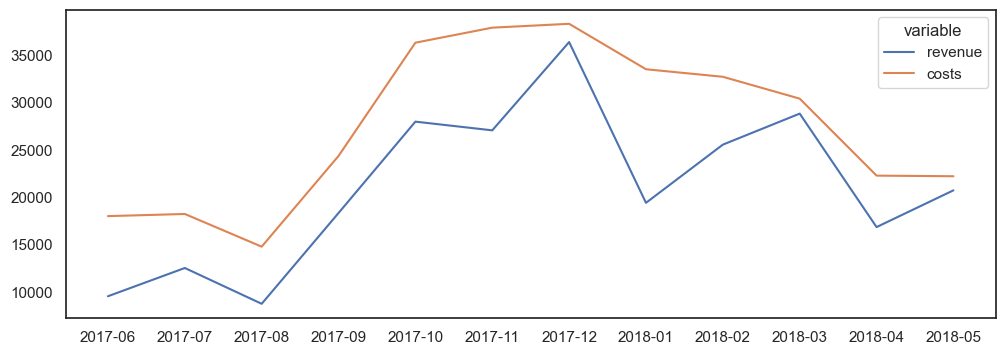

In [913]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'month', y= 'value', hue = 'variable', data = df_melt)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [914]:
roi_mean = roi_log['roi'].mean() # Calculating the mean of the ROI / Calculando a média do ROI

if roi_mean > 0:
    print("Os investimentos em marketing geraram um retorno positivo")
elif roi_mean < 0:
    print("Os custos de marketing superaram a receita gerada")
else:
    print("Os custos foram exatamente cobertos pela receita")

Os custos de marketing superaram a receita gerada


### Conclusão

- ### Produtos

    Início da semana muito semelhante a nível de acessos, tendo pico na quinta-feira e depois inicia uma queda muito brusca com pouquíssimos acessos ao final de semana. Já quando olhamos para as semanas, podemos notar que se iniciou com uma média de acessos boa, tendo alguns picos mais elevados, porém esteve sempre em uma decrescente onde podemos ver uma mudança por volta da semana 33 onde começa a voltar a ter uma curva crescente até atingir o pico máximo de acessos, na semana 47, comparado com as restantes. Quando vamos para a parte dos meses, os dados começam na metade do ano e vão até a metade do ano seguinte, onde podemos identificar que os 3 primeiros meses foram os piores, tendo então uma subida no número de acessos, mais uma vez até atingir o seu pico e depois voltando a ter uma queda, porém não tão grande por se manter na média entre os piores e os melhores meses.

    Temos uma média de 987 sessões por dia, com uma duração média de 10 minutos (658 segundos)

    Na parte da retenção de cliente não está a existir tanto sucesso, uma vez que os clientes tendem a não voltar tanto tendo uma média de apenas 6,5% de retenção entre o primeiro mês de acesso e o segundo. Dentro de todos os meses, por vezes podemos ver um aumento do mês anterior para o seguinte, porém de forma geral a porcentagem está sempre a cair quando analisamos a retenção.

- ### Vendas

    As pessoas começam a comprar em média 17 dias depois do primeiro acesso.

    Após a primeira compra, no mês seguinte apenas uma média de 115 usuários voltam a comprar e a média tende sempre a cair pouco a pouco de modo que cada mês que passa mais clientes são "perdidos". Além disso, o volume médio de compra é de 39 onde podemos identificar que há pedimos grandes e com valores expressivos, contudo, a grande maioria tem valores menores.

    Ao olharmos para o LTV, podemos notar que os cohorts como 2017-09 e 2017-12 tem picos interessantes que podem ser analisados mais afundo, uma vez que a aquisição e/ou retenção funcionou muito bem como podemos ver no age = 3 do cohort 2017-09 e age = 2 e 3 do 2017-12. Contudo, nos cohorts mais recentes não temos números muito satisfatórios podendo indicar uma redução na eficiência da aquisição ou da retenção.

- ### Marketing

    Foi gasto um total de 329131.62 com marketing, tendo o source_id 3 com o maior gasto (141321.63) e o source_id 9 com menos dinheiro investido (5517.49). Quando deixamos de olhar de modo generalista e partimos para analisar os gastos com marketing mensalmente, podemos notar que na metade do ano de 2017, entre 2017-06 e 2017-08, sendo o último mês indicado o pior e os gastos foram um pouco menor do que o investido na altura similar no ano seguinte, em 2018-05. Contudo, após este investimento menor no mês de agosto de 2017, houve um investimento maior nos meses seguintes, tendo como o mês com maior investimento 2017-12. Isso pode acontecer por ser final do ano, tendo o reforçado o marketing para as datas importantes que temos neste mês.

    O custo médio de aquisição de um cliente é de 4.80, onde temos source_id 3 com o maior CAC sendo 10.21 e o source_id 9 como o menor CAC de 1.97.

    Podemos ver que em todos os meses analisados, os custos com a operação sempre foram maiores do que a receita gerada, tendo dessa forma um impacto negativo no negocio, uma vez que as contas não fecham por gastar mais do que é gerado.

- ### Conclusão

    Da forma como está, o dinheiro gasto em marketing não está a gerar receita o suficiente que cubra os custos da operação. Quando analisamos os source_id, percebemos que o source_id 4 apesar de ter um menor investimento do que o 3, consegue atrair uma quantidade maior de usuários, assim como o source_id 5 que tem menos usuários atraídos do que o 3, porém com um custo muito menor. Deste modo a nível de marketing, o ideal seria um reajuste nos valores gastos, que com base nos dados analisados o mais adequado seria diminuir o custo do source_id 3 e redistribuir entre o source_id 4 e 5 para perceber se continuará a ter bons resultados. Podemos também ter atenção nos source_id 1 e 2, que apesar de não terem números tão grande como os outros, com o pouco investimento que têm conseguem trazer uma boa quantidade de clientes.